In [1]:
import math
from itertools import combinations

In [20]:
def L(x, y, p=2):
    # x1 = [1, 1], x2 = [5,1]
    if len(x) == len(y) and len(x) > 1:
        sum = 0
        for i in range(len(x)):
            sum += math.pow(abs(x[i] - y[i]), p)
        return math.pow(sum, 1 / p)
    else:
        return 0

In [21]:
x1 = [1, 1]
x2 = [5, 1]
x3 = [4, 4]

In [27]:
for i in range(1,5):
    r = {'1-{}'.format(c): L(x1,c,p=i) for c in [x2,x3]}
    print(min(zip(r.values(),r.keys())))

(4.0, '1-[5, 1]')
(4.0, '1-[5, 1]')
(3.7797631496846193, '1-[4, 4]')
(3.5676213450081633, '1-[4, 4]')


python实现，遍历所有数据点，找出n个距离最近的点的分类情况，少数服从多数

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

In [30]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [31]:
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


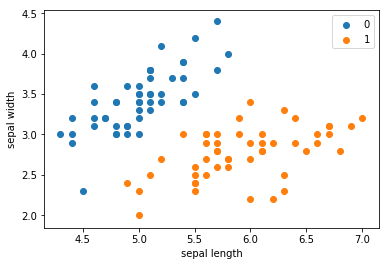

In [32]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],label='0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [33]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
class KNN:
    def __init__(self,X_train,y_train,n_neighbors=3,p=2):
        """
        parameter: n_neighbors 临近点个数
        parameter: p 距离度量
        """
        self.X_train = X_train
        self.y_train = y_train
        self.n_neighbors = n_neighbors
        self.p = p
    def predict(self,X):
        